In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix  # Importa csr_matrix desde scipy.sparse
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from pandas.api.types import is_numeric_dtype
import gc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix  # Importa csr_matrix desde scipy.sparse
from scipy import sparse 
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Cargar los datos
files = ["datosTP2/ctr_15.csv", "datosTP2/ctr_16.csv", "datosTP2/ctr_17.csv", "datosTP2/ctr_18.csv", "datosTP2/ctr_19.csv", "datosTP2/ctr_20.csv", "datosTP2/ctr_21.csv"]
combined_data = pd.concat([pd.read_csv(f) for f in files])
# Load the test data
eval_data = pd.read_csv("datosTP2/ctr_test.csv")

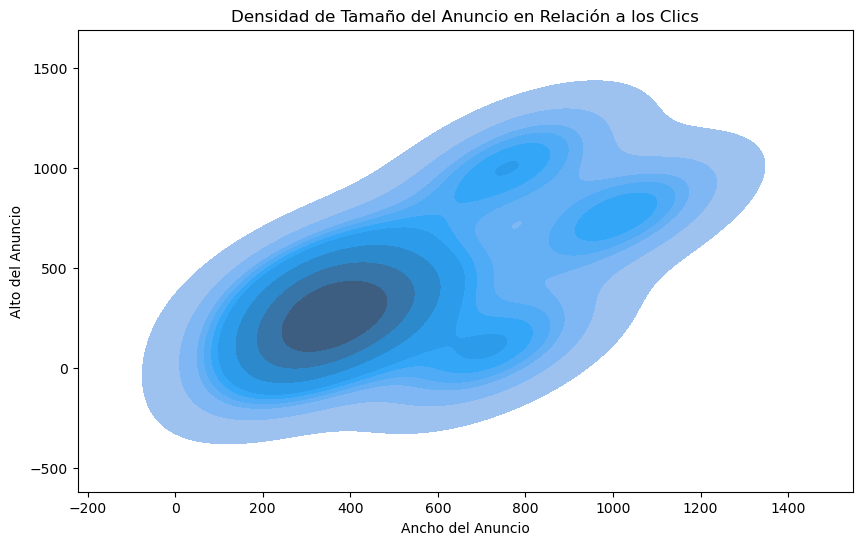

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Agrupar por ancho y alto y contar los clics
combined_data = combined_data.drop_duplicates()

grouped_data = combined_data.groupby(['creative_width', 'creative_height', 'Label']).size().reset_index(name='count')

# Graficar la densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=grouped_data, x='creative_width', y='creative_height', weights='count', fill=True)
plt.title('Densidad de Tamaño del Anuncio en Relación a los Clics')
plt.xlabel('Ancho del Anuncio')
plt.ylabel('Alto del Anuncio')
plt.show()



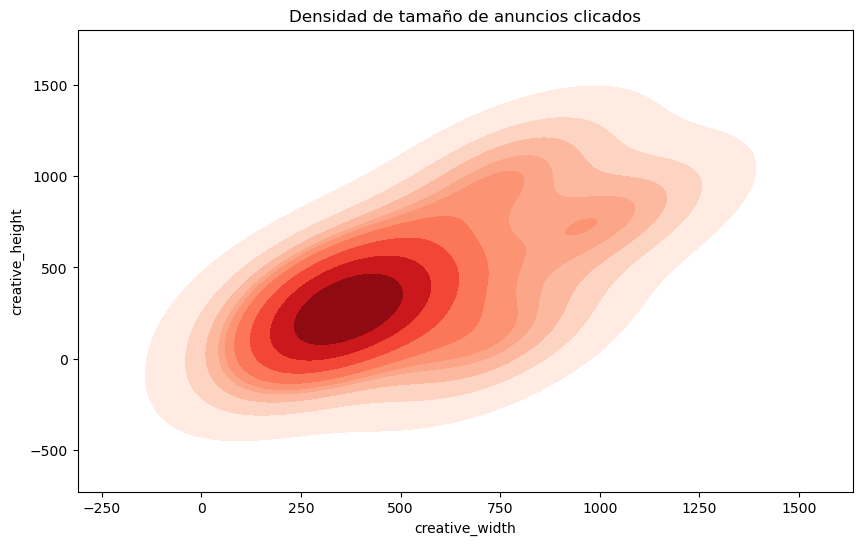

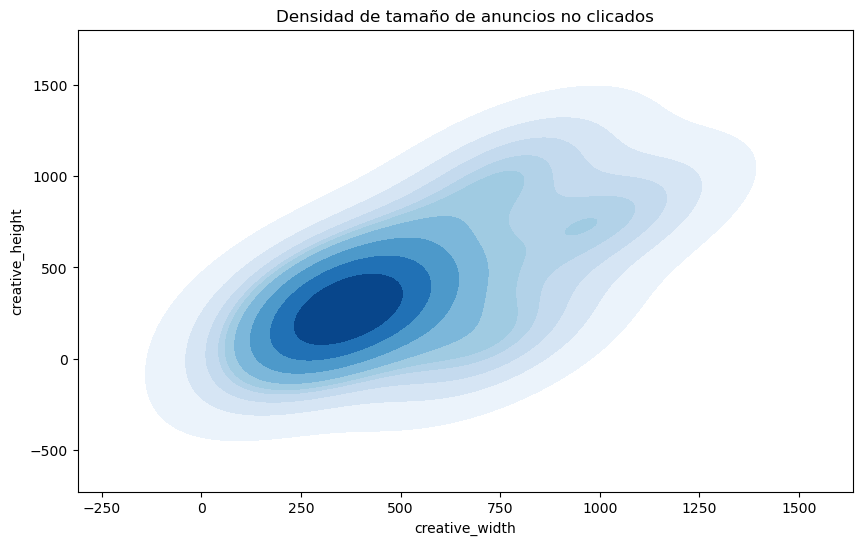

In [28]:
# Filtrar por anuncios clicados (Label = 1)
# Eliminar duplicados
combined_data = combined_data.drop_duplicates(subset=['creative_height', 'Label'])
plt.figure(figsize=(10,6))
sns.kdeplot(x=combined_data[combined_data['Label'] == 1]['creative_width'], 
            y=combined_data[combined_data['Label'] == 1]['creative_height'], 
            fill=True, cmap="Reds")
plt.title('Densidad de tamaño de anuncios clicados')
plt.show()

# Filtrar por anuncios no clicados (Label = 0)
plt.figure(figsize=(10,6))
sns.kdeplot(x=combined_data[combined_data['Label'] == 0]['creative_width'], 
            y=combined_data[combined_data['Label'] == 0]['creative_height'], 
            fill=True, cmap="Blues")
plt.title('Densidad de tamaño de anuncios no clicados')
plt.show()


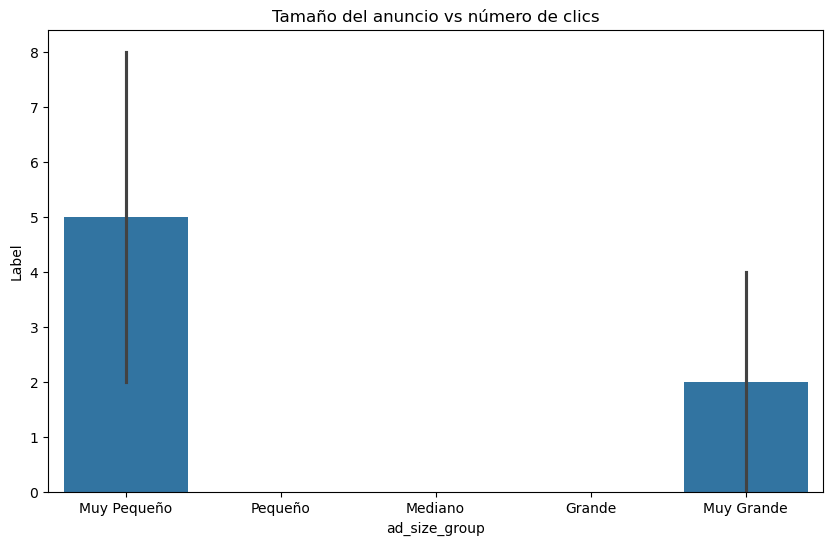

In [29]:
# Crear una variable categórica basada en rangos de tamaños de anuncio
combined_data['ad_size_group'] = pd.cut(combined_data['creative_width'] * combined_data['creative_height'], bins=5, labels=['Muy Pequeño', 'Pequeño', 'Mediano', 'Grande', 'Muy Grande'])

# Gráfico de barras para ver si los clics varían según el tamaño del anuncio
plt.figure(figsize=(10,6))
sns.barplot(x='ad_size_group', y='Label', data=combined_data, estimator=sum)
plt.title('Tamaño del anuncio vs número de clics')
plt.show()


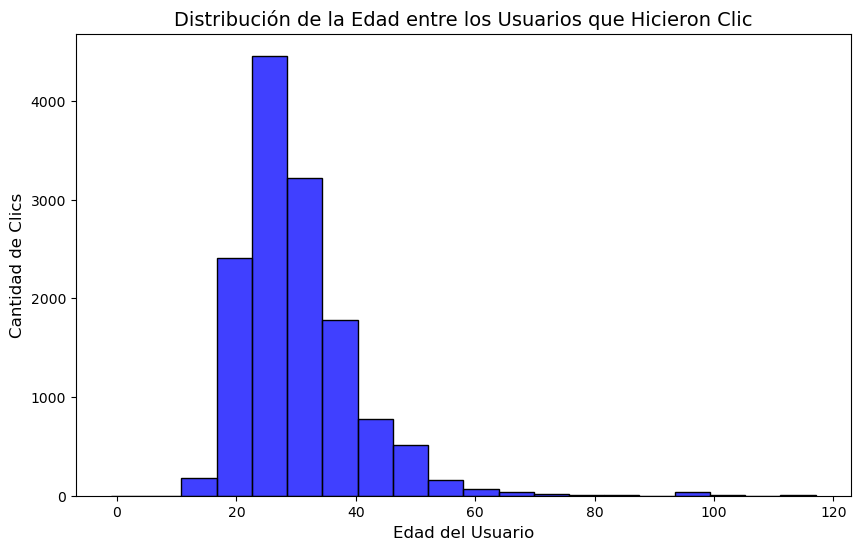

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los clics (Label = 1)
click_data = combined_data[combined_data['Label'] == 1]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras de las edades de los usuarios que hicieron clic
sns.histplot(click_data['auction_age'], bins=20, kde=False, color="blue")

# Añadir título y etiquetas
plt.title('Distribución de la Edad entre los Usuarios que Hicieron Clic', fontsize=14)
plt.xlabel('Edad del Usuario', fontsize=12)
plt.ylabel('Cantidad de Clics', fontsize=12)

# Mostrar el gráfico
plt.show()


Duplicados en 'gender': 1377265
Valores nulos en 'gender': 2


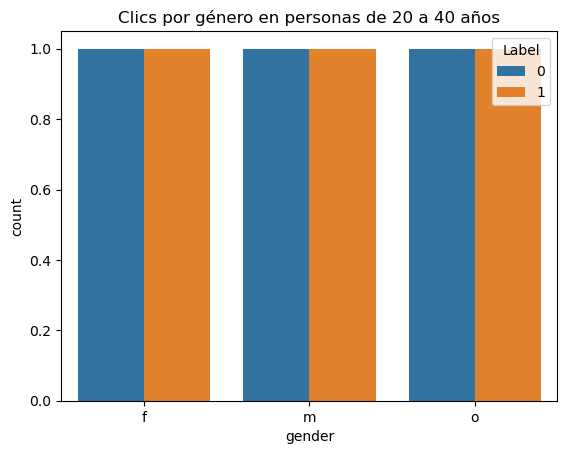

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar por rango de edad
age_filtered_data = combined_data[(combined_data['auction_age'] >= 20) & (combined_data['auction_age'] <= 40)]

# Verificar duplicados en la columna 'gender'
print("Duplicados en 'gender':", age_filtered_data['gender'].duplicated().sum())

# Eliminar duplicados en 'gender' y 'Label'
age_filtered_data = age_filtered_data.drop_duplicates(subset=['gender', 'Label'])

# Verificar valores nulos en 'gender'
print("Valores nulos en 'gender':", age_filtered_data['gender'].isnull().sum())

# Eliminar filas con valores nulos en 'gender'
age_filtered_data = age_filtered_data.dropna(subset=['gender'])

# Resetear el índice para evitar duplicados en el índice
age_filtered_data = age_filtered_data.reset_index(drop=True)

# Asegurarse de que 'gender' sea categórica
age_filtered_data['gender'] = age_filtered_data['gender'].astype('category')

# Gráfico de clics por género dentro del rango de edad
sns.countplot(x='gender', hue='Label', data=age_filtered_data)
plt.title('Clics por género en personas de 20 a 40 años')
plt.show()


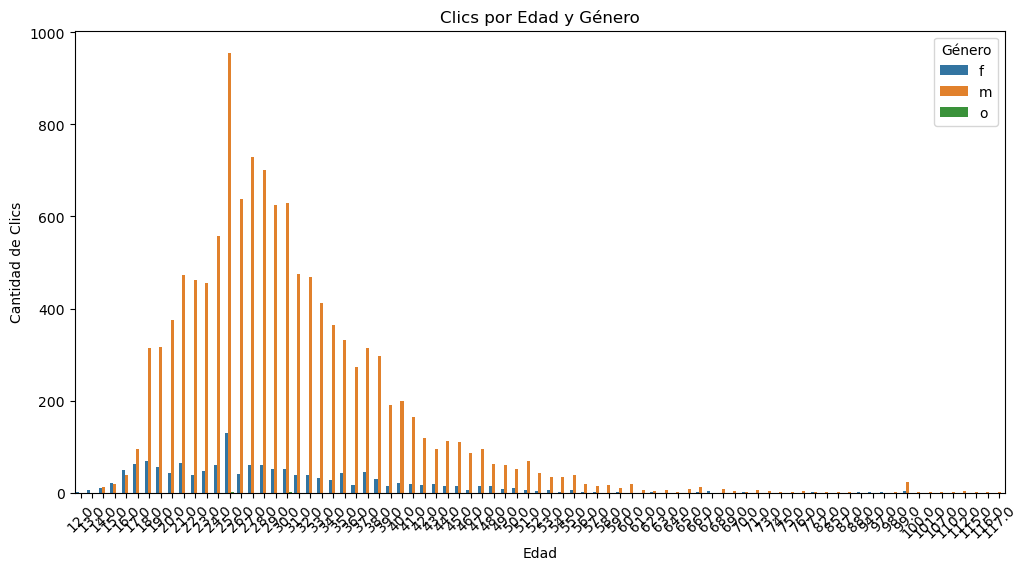

In [34]:
# Agrupar por edad y género, contando los clics
age_gender_clicks = combined_data.groupby(['auction_age', 'gender', 'Label']).size().reset_index(name='count')

# Filtrar solo los casos donde hay clics (Label == 1)
clicks_data = age_gender_clicks[age_gender_clicks['Label'] == 1]

# Gráfico de clics por edad y género
plt.figure(figsize=(12, 6))
sns.barplot(x='auction_age', y='count', hue='gender', data=clicks_data)
plt.title('Clics por Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clics')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()



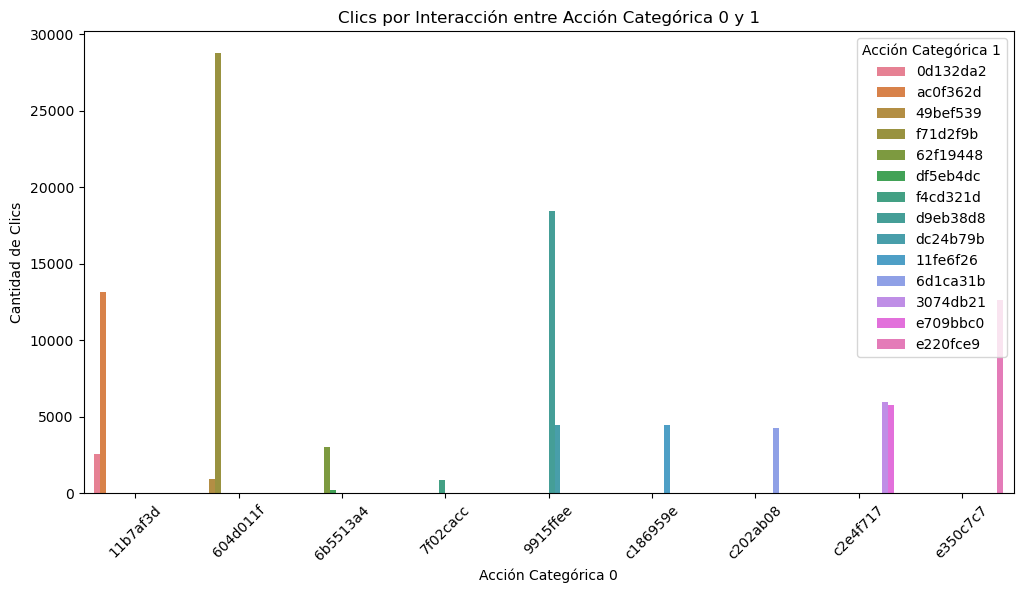

In [37]:
# Agrupar por dos acciones categóricas y contar los clics
action_interaction_clicks = combined_data.groupby(['action_categorical_0', 'action_categorical_1', 'Label']).size().reset_index(name='count')

# Filtrar solo los casos donde hay clics (Label == 1)
clicks_data = action_interaction_clicks[action_interaction_clicks['Label'] == 1]

# Gráfico de clics por interacción entre acciones categóricas
plt.figure(figsize=(12, 6))
sns.barplot(x='action_categorical_0', y='count', hue='action_categorical_1', data=clicks_data)
plt.title('Clics por Interacción entre Acción Categórica 0 y 1')
plt.xlabel('Acción Categórica 0')
plt.ylabel('Cantidad de Clics')
plt.xticks(rotation=45)
plt.legend(title='Acción Categórica 1')
plt.show()


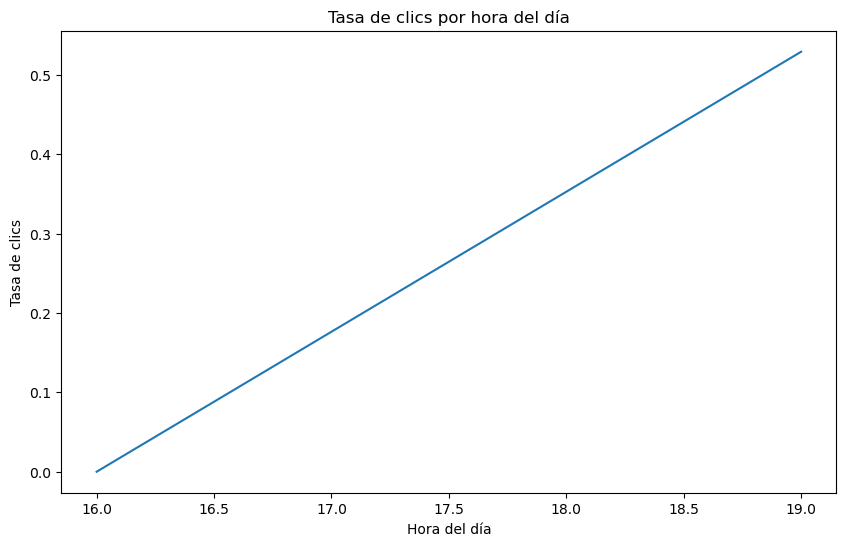

In [11]:
# Convertir el tiempo de Unix a hora del día
combined_data['hour'] = pd.to_datetime(combined_data['auction_time'], unit='s').dt.hour

# Tasa de clics por hora del día
click_rates_by_hour = combined_data.groupby('hour')['Label'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=click_rates_by_hour.index, y=click_rates_by_hour.values)
plt.title('Tasa de clics por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Tasa de clics')
plt.show()


Conteo de clases:
Label
0    8539062
1     105530
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

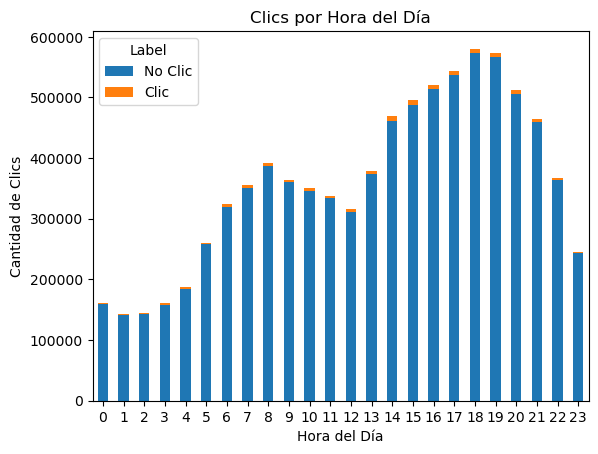

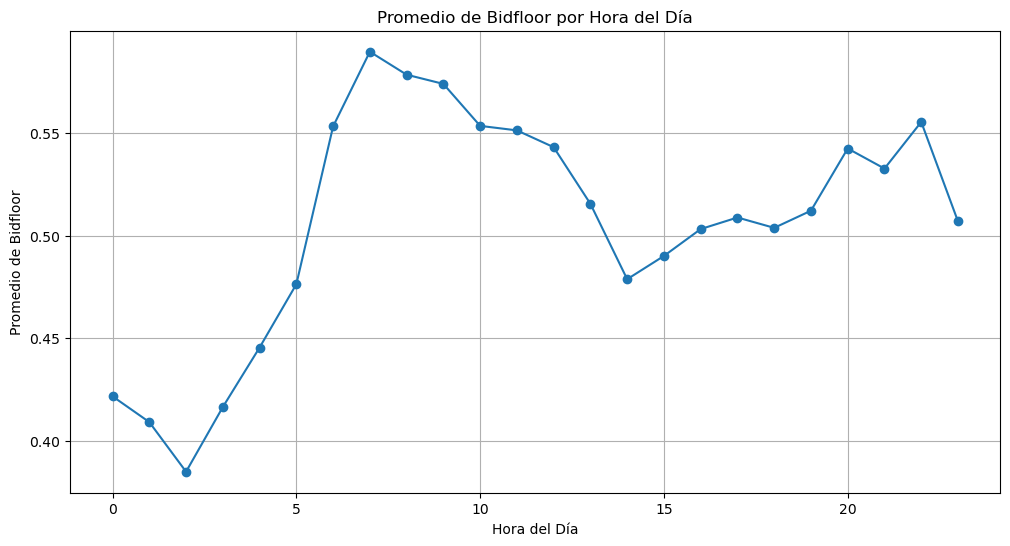

In [19]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Separar la variable objetivo y las características
y = combined_data["Label"]
X = combined_data.drop(columns=["Label"])

# Contar las ocurrencias de cada clase en la variable objetivo
label_counts = combined_data["Label"].value_counts()
print("Conteo de clases:")
print(label_counts)

# Obtener la cantidad mínima de ocurrencias entre las clases
min_count = label_counts.min()

# Crear un DataFrame vacío para almacenar los datos balanceados
balanced_data = pd.DataFrame()

# Iterar sobre cada clase y muestrear
for label in label_counts.index:
    label_data = combined_data[combined_data["Label"] == label]  # Filtrar por clase
    sampled_data = label_data.sample(n=min_count, random_state=2345)  # Muestrear
    balanced_data = pd.concat([balanced_data, sampled_data])  # Concatenar al DataFrame balanceado

# Resetear el índice del DataFrame balanceado
balanced_data.reset_index(drop=True, inplace=True)

# Asegúrate de que `combined_data` es un DataFrame existente
# Convertir la columna de tiempo de subasta a formato de fecha y hora
combined_data['auction_time'] = pd.to_datetime(combined_data['auction_time'], unit='s')

# Extraer la hora y el día de la semana de la columna de tiempo de subasta
combined_data['auction_hour'] = combined_data['auction_time'].dt.hour
combined_data['auction_day'] = combined_data['auction_time'].dt.day_name()

# Agrupar por hora y contar los clics
hourly_clicks = combined_data.groupby('auction_hour')['Label'].value_counts().unstack().fillna(0)

# Gráfico de clics por hora
plt.figure(figsize=(12, 6))
hourly_clicks.plot(kind='bar', stacked=True)
plt.title('Clics por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Clics')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['No Clic', 'Clic'])
plt.show()

# Agrupar por hora y calcular el promedio de auction_bidfloor
hourly_bidfloor = combined_data.groupby('auction_hour')['auction_bidfloor'].mean()

# Gráfico de auction_bidfloor por hora
plt.figure(figsize=(12, 6))
hourly_bidfloor.plot(kind='line', marker='o')
plt.title('Promedio de Bidfloor por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Bidfloor')
plt.xticks(rotation=0)
plt.grid()
plt.show()



<Figure size 1200x600 with 0 Axes>

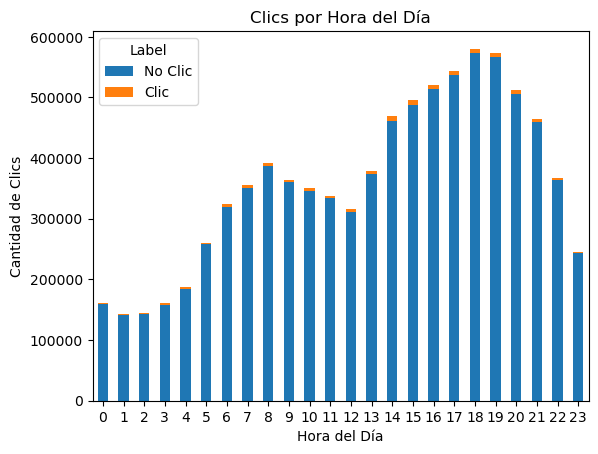

In [12]:
# Agrupar por hora y contar los clics
hourly_clicks = combined_data.groupby('auction_hour')['Label'].value_counts().unstack().fillna(0)

# Gráfico de clics por hora
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
hourly_clicks.plot(kind='bar', stacked=True)
plt.title('Clics por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Clics')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['No Clic', 'Clic'])
plt.show()


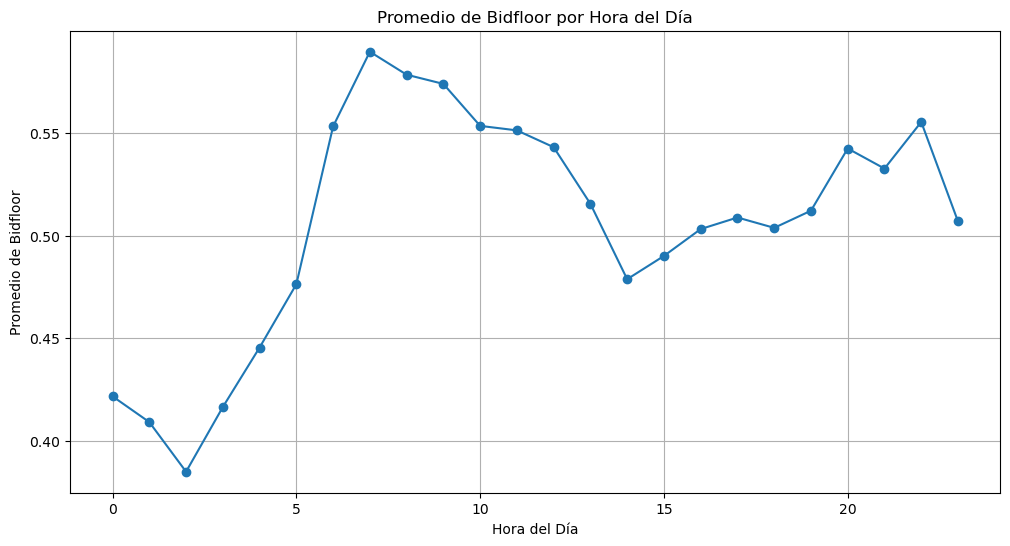

In [13]:
# Agrupar por hora y calcular el promedio de auction_bidfloor
hourly_bidfloor = combined_data.groupby('auction_hour')['auction_bidfloor'].mean()

# Gráfico de auction_bidfloor por hora
plt.figure(figsize=(12, 6))
hourly_bidfloor.plot(kind='line', marker='o')
plt.title('Promedio de Bidfloor por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Bidfloor')
plt.xticks(rotation=0)
plt.grid()
plt.show()


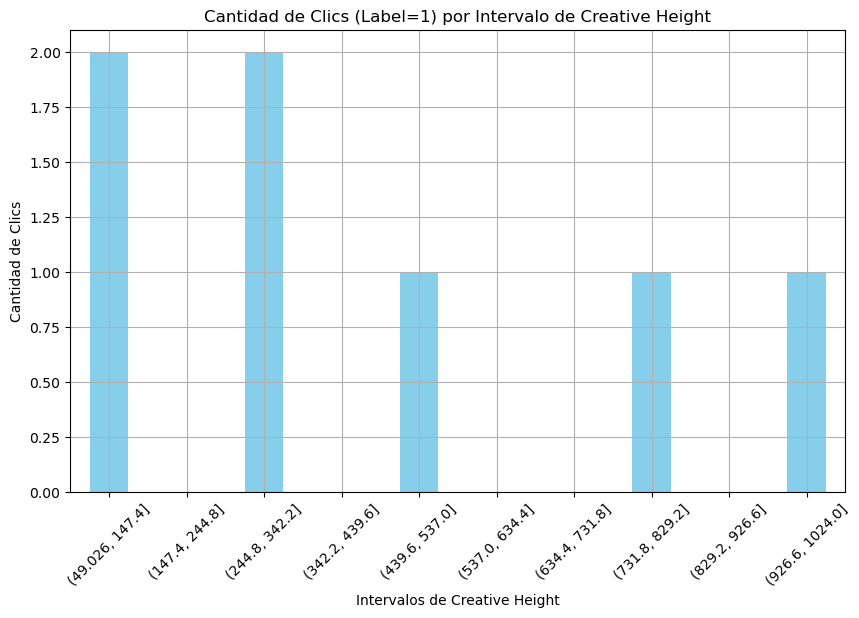

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear intervalos para agrupar las alturas (creative_height)
combined_data['height_bins'] = pd.cut(combined_data['creative_height'], bins=10)

# Filtrar los registros donde Label es 1 (clics)
click_data = combined_data[combined_data['Label'] == 1]

# Contar la cantidad de clics (Label = 1) en cada intervalo de creative_height
clicks_by_height = click_data['height_bins'].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))
clicks_by_height.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Clics (Label=1) por Intervalo de Creative Height')
plt.xlabel('Intervalos de Creative Height')
plt.ylabel('Cantidad de Clics')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


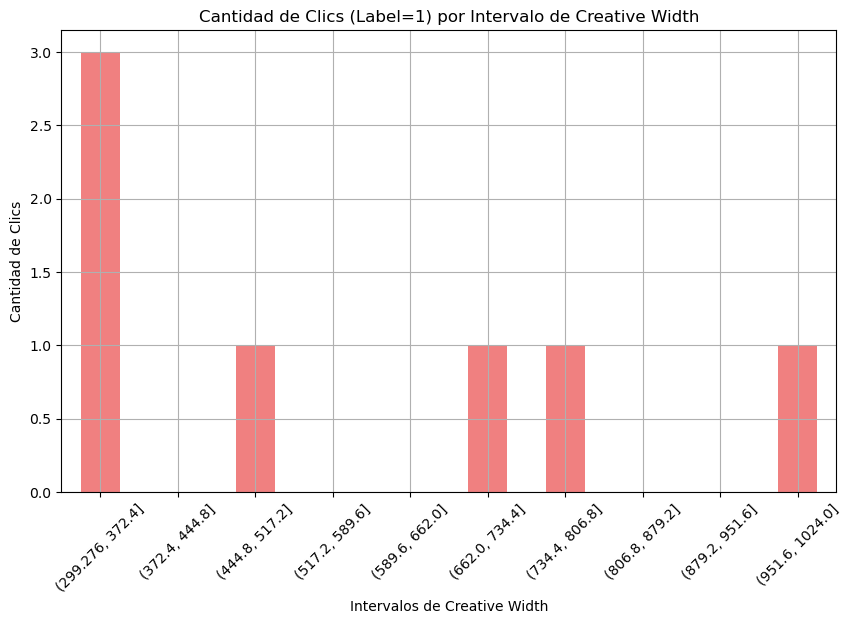

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear intervalos para agrupar las anchuras (creative_width)
combined_data['width_bins'] = pd.cut(combined_data['creative_width'], bins=10)

# Filtrar los registros donde Label es 1 (clics)
click_data = combined_data[combined_data['Label'] == 1]

# Contar la cantidad de clics (Label = 1) en cada intervalo de creative_width
clicks_by_width = click_data['width_bins'].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))
clicks_by_width.plot(kind='bar', color='lightcoral')
plt.title('Cantidad de Clics (Label=1) por Intervalo de Creative Width')
plt.xlabel('Intervalos de Creative Width')
plt.ylabel('Cantidad de Clics')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
